In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from typing import List
from collections import OrderedDict
import os
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [3]:
class Segmentations:
    def __init__(self,
                 path_to_seg_file: str,
                 song_names: List[str]):
        _, self.segments, _ = \
            np.load(path_to_seg_file, allow_pickle=True)
        self.song_names = [name.upper() for name in song_names]
    
    def get_song_name_range(self, name):
        song_idx = self.song_names.index(name)
        if song_idx == -1:
            raise ValueError(f"Song {song} not found.")
        return self.segments[song_idx].tolist()

In [4]:
musdb_root = "/exports/projects/computer-audition/data/musdb/raw/stems/"
train_songs = sorted([p.rsplit(".", 2)[0] for p in os.listdir(os.path.join(musdb_root, "train"))])
train_segmentations = Segmentations("train_segmentation.npy", train_songs)
test_songs = sorted([p.rsplit(".", 2)[0] for p in os.listdir(os.path.join(musdb_root, "test"))])
test_segmentations = Segmentations("test_segmentation.npy", test_songs)

test_data = {}
test_data["OpenUnmix"] = pd.read_csv("results/OpenUnmix/MUSDB18Segmented/aggreggate.csv")
test_data["Demucs"] = pd.read_csv("results/Demucs/MUSDB18Segmented/aggreggate.csv")
test_data["ConvTasNet"] = pd.read_csv("results/ConvTasNet/MUSDB18Segmented/aggreggate.csv")
test_data["Wave-U-Net"] = pd.read_csv("results/Wave-U-Net/MUSDB18Segmented/aggreggate.csv")
         
train_data = {}
train_data["OpenUnmix"] = pd.read_csv("results/OpenUnmix/MUSDB18Segmented_train/aggreggate.csv")
train_data["Demucs"] = pd.read_csv("results/Demucs/MUSDB18Segmented_train/aggreggate.csv")
train_data["ConvTasNet"] = pd.read_csv("results/ConvTasNet/MUSDB18Segmented_train/aggreggate.csv")
train_data["Wave-U-Net"] = pd.read_csv("results/Wave-U-Net/MUSDB18Segmented_train/aggreggate.csv")

genre_metadata = pd.concat([
    pd.read_csv("medleydb_genre.csv"), pd.read_csv("dsd_genre.csv", quotechar='"'), pd.read_csv("self_labeled.csv")
],axis=0).reset_index()[["Artist - Title", "Genre"]]
genre_metadata["Artist - Title"] = genre_metadata["Artist - Title"].apply(lambda name: name.replace(" Multitracks", "").upper())
genre_metadata["Split"] = genre_metadata["Artist - Title"].apply(
    lambda name: 'train' if name in train_segmentations.song_names
                         else ('test' if name in test_segmentations.song_names
                                      else None)
)
# Combining pop and rock together, because DSD combines them
genre_metadata["Genre"] = genre_metadata["Genre"].apply(lambda name: "Pop/Rock" if name in ["Pop", "Rock"] else name)
genre_metadata_valid = genre_metadata[(genre_metadata["Split"] == 'test') | (genre_metadata["Split"] == 'train')]

In [5]:
genres = genre_metadata_valid["Genre"].value_counts()
display(genres)

Pop/Rock             97
Singer/Songwriter    16
Heavy Metal          12
Electronic            9
Rap                   8
Jazz                  3
Musical Theatre       2
Reggae                2
Country               1
Name: Genre, dtype: int64

In [6]:
    
def split_by_sources(df):
    return {name: g_df for name, g_df in df.groupby(by="source")}
test_data_sources = {k: split_by_sources(df) for k, df in test_data.items()}
train_data_sources = {k: split_by_sources(df) for k, df in train_data.items()}

POP/ROCK
OPENUNMIX


,SNR,SI-SDR,SI-SAR
bass,4.672382,2.477880,3.718242
drums,5.957174,4.351930,4.975057
other,3.662720,0.744644,1.837205
vocals,6.136298,4.376445,4.980412


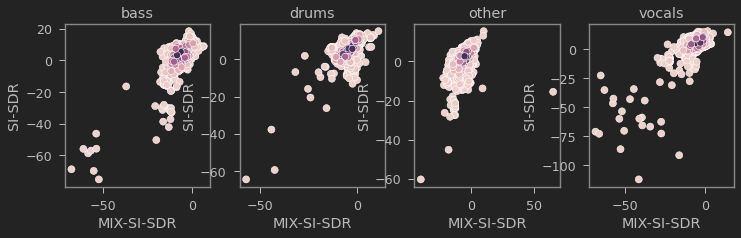

DEMUCS


,SNR,SI-SDR,SI-SAR
bass,5.914605,4.314169,4.996526
drums,7.192374,6.088535,6.469795
other,3.938927,1.656913,2.756625
vocals,6.603032,4.647570,5.187953


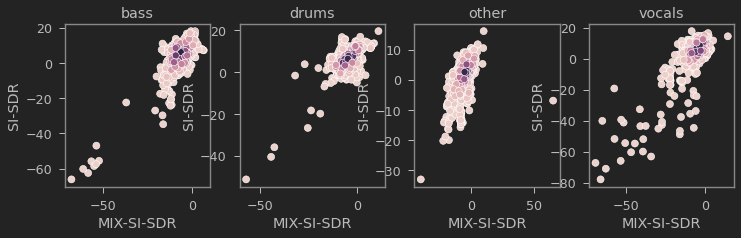

CONVTASNET


,SNR,SI-SDR,SI-SAR
bass,6.296064,4.068171,4.801844
drums,7.658181,6.526681,6.979674
other,4.322647,1.773237,2.739342
vocals,6.777579,4.643061,5.554928


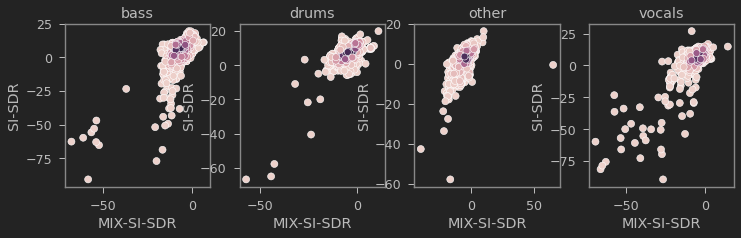

WAVE-U-NET


,SNR,SI-SDR,SI-SAR
bass,2.695788,-0.162730,0.823044
drums,4.040453,1.311155,1.720415
other,2.269622,-2.162498,-0.274246
vocals,4.405568,1.622919,2.766373


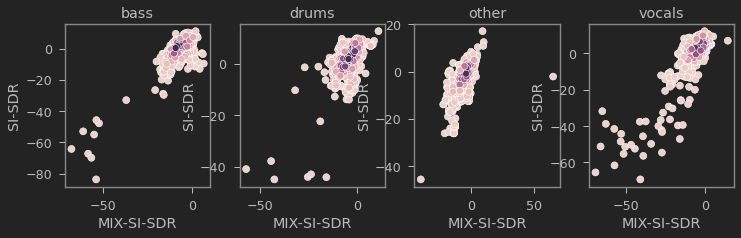

SINGER/SONGWRITER
OPENUNMIX


,SNR,SI-SDR,SI-SAR
bass,4.672382,2.477880,3.718242
drums,5.957174,4.351930,4.975057
other,3.662720,0.744644,1.837205
vocals,6.136298,4.376445,4.980412


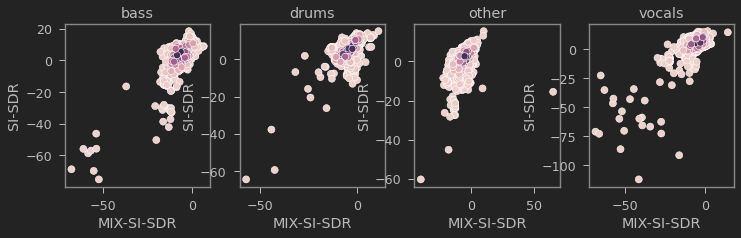

DEMUCS


,SNR,SI-SDR,SI-SAR
bass,5.914605,4.314169,4.996526
drums,7.192374,6.088535,6.469795
other,3.938927,1.656913,2.756625
vocals,6.603032,4.647570,5.187953


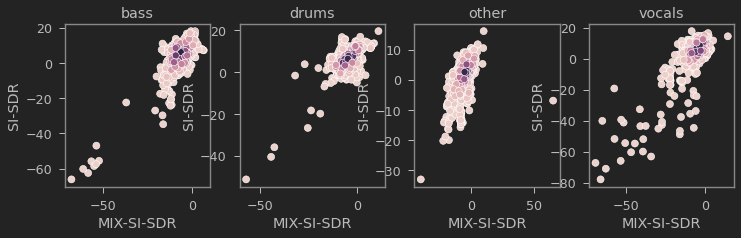

CONVTASNET


,SNR,SI-SDR,SI-SAR
bass,6.296064,4.068171,4.801844
drums,7.658181,6.526681,6.979674
other,4.322647,1.773237,2.739342
vocals,6.777579,4.643061,5.554928


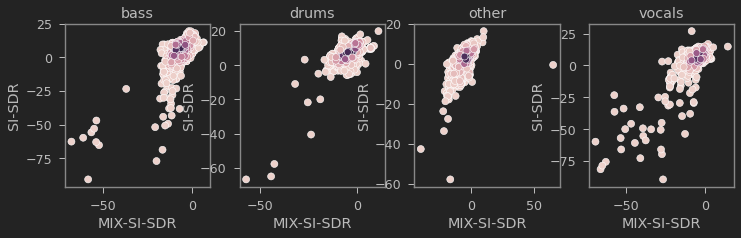

WAVE-U-NET


,SNR,SI-SDR,SI-SAR
bass,2.695788,-0.162730,0.823044
drums,4.040453,1.311155,1.720415
other,2.269622,-2.162498,-0.274246
vocals,4.405568,1.622919,2.766373


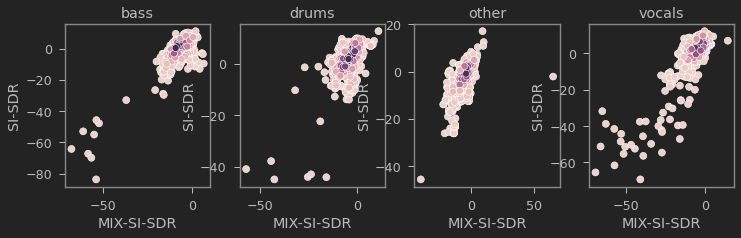

HEAVY METAL
OPENUNMIX


,SNR,SI-SDR,SI-SAR
bass,4.672382,2.477880,3.718242
drums,5.957174,4.351930,4.975057
other,3.662720,0.744644,1.837205
vocals,6.136298,4.376445,4.980412


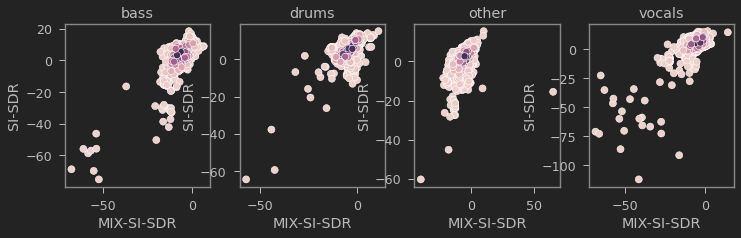

DEMUCS


,SNR,SI-SDR,SI-SAR
bass,5.914605,4.314169,4.996526
drums,7.192374,6.088535,6.469795
other,3.938927,1.656913,2.756625
vocals,6.603032,4.647570,5.187953


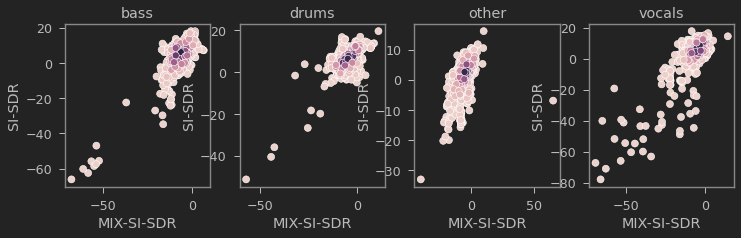

CONVTASNET


,SNR,SI-SDR,SI-SAR
bass,6.296064,4.068171,4.801844
drums,7.658181,6.526681,6.979674
other,4.322647,1.773237,2.739342
vocals,6.777579,4.643061,5.554928


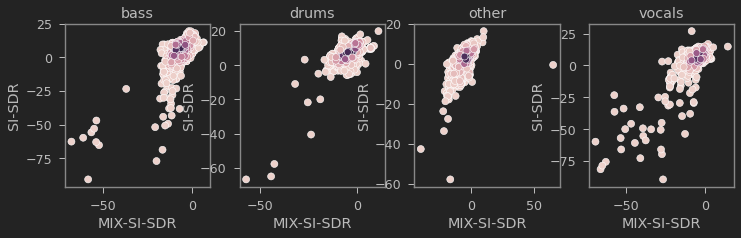

WAVE-U-NET


,SNR,SI-SDR,SI-SAR
bass,2.695788,-0.162730,0.823044
drums,4.040453,1.311155,1.720415
other,2.269622,-2.162498,-0.274246
vocals,4.405568,1.622919,2.766373


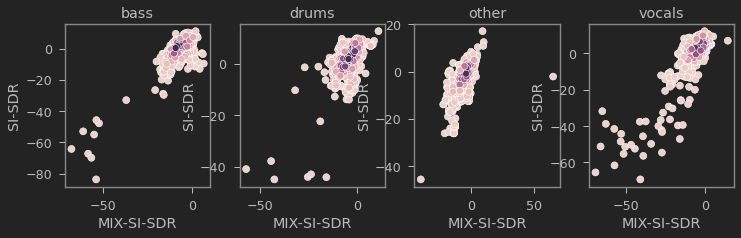

ELECTRONIC
OPENUNMIX


,SNR,SI-SDR,SI-SAR
bass,4.672382,2.477880,3.718242
drums,5.957174,4.351930,4.975057
other,3.662720,0.744644,1.837205
vocals,6.136298,4.376445,4.980412


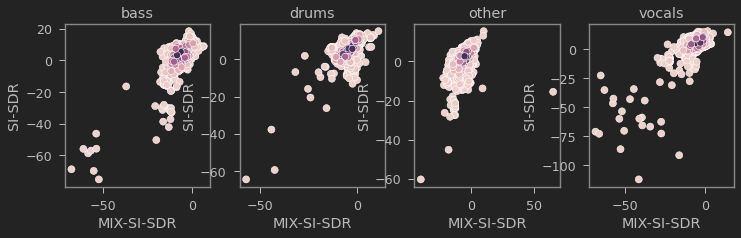

DEMUCS


,SNR,SI-SDR,SI-SAR
bass,5.914605,4.314169,4.996526
drums,7.192374,6.088535,6.469795
other,3.938927,1.656913,2.756625
vocals,6.603032,4.647570,5.187953


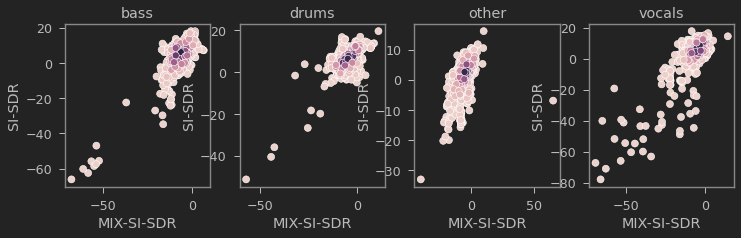

CONVTASNET


,SNR,SI-SDR,SI-SAR
bass,6.296064,4.068171,4.801844
drums,7.658181,6.526681,6.979674
other,4.322647,1.773237,2.739342
vocals,6.777579,4.643061,5.554928


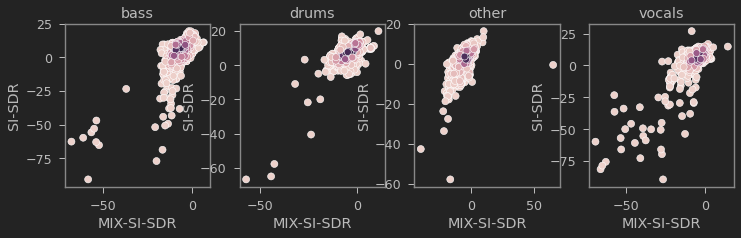

WAVE-U-NET


,SNR,SI-SDR,SI-SAR
bass,2.695788,-0.162730,0.823044
drums,4.040453,1.311155,1.720415
other,2.269622,-2.162498,-0.274246
vocals,4.405568,1.622919,2.766373


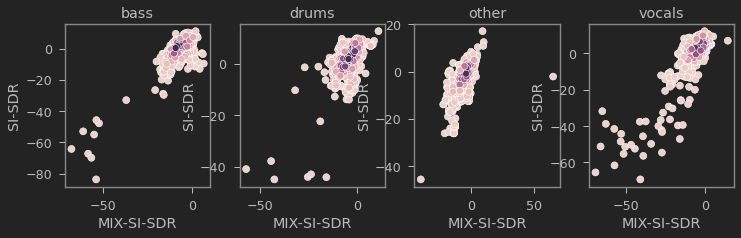

RAP
OPENUNMIX


,SNR,SI-SDR,SI-SAR
bass,4.672382,2.477880,3.718242
drums,5.957174,4.351930,4.975057
other,3.662720,0.744644,1.837205
vocals,6.136298,4.376445,4.980412


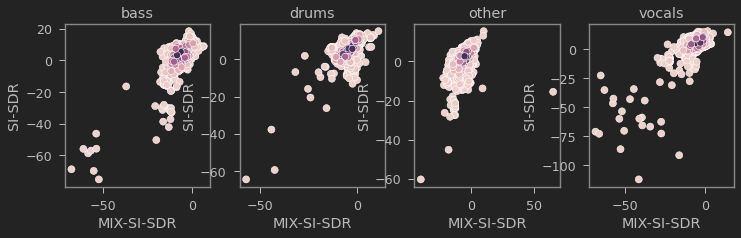

DEMUCS


,SNR,SI-SDR,SI-SAR
bass,5.914605,4.314169,4.996526
drums,7.192374,6.088535,6.469795
other,3.938927,1.656913,2.756625
vocals,6.603032,4.647570,5.187953


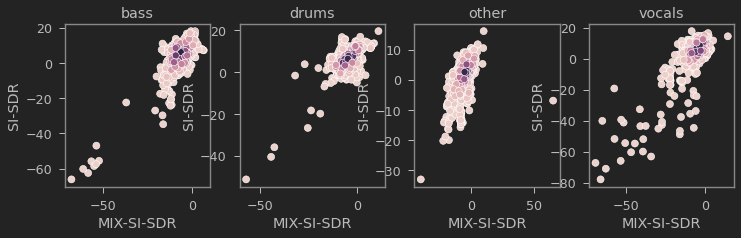

CONVTASNET


,SNR,SI-SDR,SI-SAR
bass,6.296064,4.068171,4.801844
drums,7.658181,6.526681,6.979674
other,4.322647,1.773237,2.739342
vocals,6.777579,4.643061,5.554928


In [ ]:
def display_genre_info(sources_data, genre, split):
    """
    Things this function should do:
     - Output SNR, SI-SDR, and SI-SAR for each source
     - Density plot of SI-SDR vs. MIX-SI-SDR
    """
    assert split in ["train", "test"]
    def _filter_files(song_df):
        # this might be slow...
        song_names = song_df["Artist - Title"]
        segmentation = train_segmentations if split == "train" else test_segmentations
        song_numbers = set(sum([
            segmentation.get_song_name_range(name)
            for name in song_names
        ], []))
        filtered_data = {}
        for source, df in sources_data.items():
            filtered_data[source] = df[df["file"].apply(
                lambda file: int(file.split(".")[0]) in song_numbers
            )]
        return filtered_data
    
    def _generate_aggregations(sources_data):
        agg = {}
        sources = list(sources_data.keys())
        for source in sources:
            for metric in ["SNR", "SI-SDR", "SI-SAR"]:
                mean = sources_data[source][metric].mean()
                agg[metric] = agg.get(metric, []) + [mean]
        return pd.DataFrame(agg, index=sources)
                
    
    def _generate_graphs(sources_data):
        fig, axes = plt.subplots(1, len(sources_data), figsize=(12, 3))
        for idx, (source, source_df) in enumerate(sources_data.items()):
            ax = axes[idx]
            ax.set_title(source)
            x = source_df["MIX-SI-SDR"]
            y = source_df["SI-SDR"]
            xy = np.vstack([x.to_numpy(), y.to_numpy()])
            z = gaussian_kde(xy)(xy)
            sns.scatterplot(x=x, y=y, hue=z*10, ax=ax, legend=False)
        return fig
    
    song_df = genre_metadata_valid[(genre_metadata_valid["Genre"] == genre)
                                   & (genre_metadata_valid["Split"] == split)]
    filtered_df = _filter_files(song_df)
    display(_generate_aggregations(sources_data))
    display(_generate_graphs(sources_data))

for genre in genres.index:
    print(genre.upper())
    for key, sources_data in test_data_sources.items():
        print(key.upper())
        display_genre_info(sources_data, genre, "test")

In [ ]:
test_data["Demucs"].keys()